In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Doutorado/Tese/MLData/CASSCF/big_data.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (76,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df[['Structure name',
 'Cartesian coordinates',
 'Internal coordinates',
 'Coordination number',
 'Bond lengths 1',
 'Bond lengths 2',
 'Bond angles',
 'CAS root Mult',
 'CAS GS energy (Eh)',
 'CAS transition energies',
 'CAS 1 el energy (Eh)',
 'CAS 2 el energy (Eh)',
 'CAS nucl. repulsion (Eh)',
 'Kinetic energy (Eh)',
 'Potential energy (Eh)',
 'Virial ratio (Eh)',
 'Core energy (Eh)',
 'SOC CAS lowest eigenv. (Eh)',
 'SOC CAS stab. energy (cm-1)',
 'CAS Kramers',
 'CAS Ms states',
 'CAS 2PT D',
 'CAS 2PT E/D',
 'CAS Heff D',
 'CAS Heff E/D',
 'CAS gx',
 'CAS gy',
 'CAS gz',
 'CAS giso',
 'CAS F0dd',
 'CAS F2dd',
 'CAS F4dd',
 'CAS Racah A',
 'CAS Racah B',
 'CAS Racah C',
 'CAS d-orb1 (eV)',
 'CAS d-orb1 (cm-1)',
 'CAS d-orb1 (xy)',
 'CAS d-orb1 (yz)',
 'CAS d-orb1 (z2)',
 'CAS d-orb1 (xz)',
 'CAS d-orb1 (x2y2)',
 'CAS d-orb2 (eV)',
 'CAS d-orb2 (cm-1)',
 'CAS d-orb2 (xy)',
 'CAS d-orb2 (yz)',
 'CAS d-orb2 (z2)',
 'CAS d-orb2 (xz)',
 'CAS d-orb2 (x2y2)',
 'CAS d-orb3 (eV)',
 'CAS d-orb3 (cm-1)',
 'CAS d-orb3 (xy)',
 'CAS d-orb3 (yz)',
 'CAS d-orb3 (z2)',
 'CAS d-orb3 (xz)',
 'CAS d-orb3 (x2y2)',
 'CAS d-orb4 (eV)',
 'CAS d-orb4 (cm-1)',
 'CAS d-orb4 (xy)',
 'CAS d-orb4 (yz)',
 'CAS d-orb4 (z2)',
 'CAS d-orb4 (xz)',
 'CAS d-orb4 (x2y2)',
 'CAS d-orb5 (eV)',
 'CAS d-orb5 (cm-1)',
 'CAS d-orb5 (xy)',
 'CAS d-orb5 (yz)',
 'CAS d-orb5 (z2)',
 'CAS d-orb5 (xz)',
 'CAS d-orb5 (x2y2)',
 'CAS SOC a',
 'CAS SOC b',
 'CAS SOC Zeta']]

In [ ]:
df = df.dropna(how="all")

In [ ]:
df = df.reset_index()

In [ ]:
df.drop('index', axis=1, inplace=True)
df = df[df["CAS root Mult"] != 2]
df["CAS Heff D"] = df["CAS Heff D"].round(4)
df["CAS Heff E/D"] = df["CAS Heff E/D"].round(4)
df = df[df["CAS Heff E/D"] != 0.0]
df = df[df["CAS Heff D"] != 0.0]

In [ ]:
df.info()
df_bkp = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33508 entries, 78 to 33730
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Structure name               33508 non-null  object 
 1   Cartesian coordinates        33508 non-null  object 
 2   Internal coordinates         33508 non-null  object 
 3   Coordination number          33508 non-null  float64
 4   Bond lengths 1               33508 non-null  float64
 5   Bond lengths 2               33508 non-null  float64
 6   Bond angles                  33508 non-null  float64
 7   CAS root Mult                33508 non-null  float64
 8   CAS GS energy (Eh)           33508 non-null  float64
 9   CAS transition energies      33508 non-null  object 
 10  CAS 1 el energy (Eh)         33508 non-null  float64
 11  CAS 2 el energy (Eh)         33508 non-null  float64
 12  CAS nucl. repulsion (Eh)     33508 non-null  float64
 13  Kinetic energy 

In [ ]:
df = df._get_numeric_data().drop(["CAS d-orb1 (eV)", "CAS d-orb1 (cm-1)", "CAS SOC a", "SOC CAS lowest eigenv. (Eh)", "CAS root Mult"], axis=1)

In [ ]:
df[["Coordination number"]] = df[["Coordination number"]].astype(int)

In [ ]:
df

,Coordination number,Bond lengths 1,Bond lengths 2,Bond angles,CAS GS energy (Eh),CAS 1 el energy (Eh),CAS 2 el energy (Eh),CAS nucl. repulsion (Eh),Kinetic energy (Eh),Potential energy (Eh),Virial ratio (Eh),Core energy (Eh),SOC CAS stab. energy (cm-1),CAS 2PT D,CAS 2PT E/D,CAS Heff D,CAS Heff E/D,CAS gx,CAS gy,CAS gz,CAS giso,CAS F0dd,CAS F2dd,CAS F4dd,CAS Racah A,CAS Racah B,CAS Racah C,CAS d-orb1 (xy),CAS d-orb1 (yz),CAS d-orb1 (z2),CAS d-orb1 (xz),CAS d-orb1 (x2y2),CAS d-orb2 (eV),CAS d-orb2 (cm-1),CAS d-orb2 (xy),CAS d-orb2 (yz),CAS d-orb2 (z2),CAS d-orb2 (xz),CAS d-orb2 (x2y2),CAS d-orb3 (eV),CAS d-orb3 (cm-1),CAS d-orb3 (xy),CAS d-orb3 (yz),CAS d-orb3 (z2),CAS d-orb3 (xz),CAS d-orb3 (x2y2),CAS d-orb4 (eV),CAS d-orb4 (cm-1),CAS d-orb4 (xy),CAS d-orb4 (yz),CAS d-orb4 (z2),CAS d-orb4 (xz),CAS d-orb4 (x2y2),CAS d-orb5 (eV),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC b,CAS SOC Zeta
78,2,2.6,2.400000,180.000000,-1493.261544,-2327.418524,692.611924,141.637901,1492.447193,-2985.615892,-2.000483,-1466.315463,-826.53459,-250.411689,0.000221,-250.4117,0.0001,1.327631,1.327698,4.407214,2.354181,201762.8,92668.7,57739.6,195347.3,1236.6,4582.5,-0.001033,-0.999999,0.000186,-0.000094,0.000117,0.000,3.9,0.000084,0.000220,0.866942,-0.001123,0.498407,0.249,2010.7,-0.983528,0.000999,0.000244,0.180752,0.000149,0.249,2010.8,-0.180752,0.000278,-0.000954,-0.983528,-0.000528,0.565,4557.0,0.000011,0.000009,-0.498407,0.000016,0.866943,7944.8,529.7
89,2,1.8,2.600000,175.000000,-1493.258181,-2364.311959,710.950496,160.198938,1492.978235,-2986.140760,-2.000123,-1466.832297,-809.02189,-252.120767,0.000053,-252.1208,0.0001,1.294912,1.296576,4.391853,2.327780,198324.5,90292.2,56852.1,192007.6,1198.1,4512.1,0.042121,0.632828,-0.673972,0.045156,-0.376135,0.001,8.7,0.002262,0.772961,0.553700,0.008668,0.309624,0.293,2366.2,-0.173746,-0.029883,0.022530,0.984046,0.008034,0.297,2393.0,-0.983660,0.034150,-0.021076,-0.171867,-0.035567,0.948,7648.5,-0.021141,0.000178,-0.488085,0.000323,0.872540,7828.0,521.9
90,2,1.9,1.800000,175.000000,-1493.280136,-2403.677133,730.549007,179.944189,1493.392966,-2986.576903,-1.999860,-1467.285834,-790.88018,-251.840222,0.000037,-251.8402,0.0001,1.322038,1.325258,4.378243,2.341846,195854.7,88589.4,56375.3,189590.8,1168.8,4474.2,-0.020506,0.435947,0.788691,-0.017491,0.432656,0.001,5.6,-0.054372,-0.897823,0.381150,-0.061133,0.204804,0.327,2639.2,0.024263,-0.048469,0.037312,0.997583,0.022298,0.336,2708.1,-0.994746,0.038918,0.002842,0.027999,-0.090408,1.111,8964.5,-0.080715,-0.000158,-0.480928,0.000429,0.873037,7733.1,515.5
91,2,1.9,1.900000,175.000000,-1493.293918,-2395.997525,726.763765,176.035937,1493.231913,-2986.429737,-1.999977,-1467.185276,-801.95271,-251.473341,0.000027,-251.4733,0.0001,1.297383,1.300477,4.387623,2.328495,196832.8,89248.6,56542.4,190550.3,1180.3,4487.5,-0.040206,0.051572,0.873287,-0.030075,0.481859,0.000,2.8,-0.032699,-0.997157,0.043831,-0.047112,0.021616,0.325,2620.1,-0.008629,-0.045315,0.028531,0.998419,0.014739,0.332,2680.3,-0.995996,0.031051,-0.001762,-0.005914,-0.083606,1.064,8581.0,-0.072332,-0.000036,-0.484387,0.000344,0.871858,7769.1,517.9
92,2,1.9,2.000000,175.000000,-1493.299621,-2388.969988,723.287612,172.478714,1493.111632,-2986.315294,-2.000062,-1467.098391,-807.65838,-251.232650,0.000022,-251.2326,0.0001,1.286634,1.289573,4.392279,2.322828,197551.4,89739.7,56678.4,191253.8,1188.8,4498.3,-0.047704,-0.410914,0.795387,-0.042100,0.440977,0.000,3.0,-0.005723,-0.910273,-0.360328,-0.029182,-0.201701,0.322,2597.2,-0.034815,-0.043079,0.022975,0.998151,0.009944,0.329,2649.7,-0.996177,0.026409,-0.005489,-0.032719,-0.076378,1.022,8241.6,-0.064119,0.000053,-0.486791,0.000292,0.871162,7796.0,519.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
to_keep = ['Coordination number',
 'Virial ratio (Eh)',
 'SOC CAS stab. energy (cm-1)',
 'CAS Heff D',
 'CAS Heff E/D',
 'CAS gx',
 'CAS gy',
 'CAS gz',
 'CAS giso',
 'CAS F0dd',
 'CAS F2dd',
 'CAS F4dd',
 'CAS Racah A',
 'CAS Racah B',
 'CAS Racah C',
 'CAS d-orb1 (xy)',
 'CAS d-orb1 (yz)',
 'CAS d-orb1 (z2)',
 'CAS d-orb1 (xz)',
 'CAS d-orb1 (x2y2)',
 'CAS d-orb2 (cm-1)',
 'CAS d-orb2 (xy)',
 'CAS d-orb2 (yz)',
 'CAS d-orb2 (z2)',
 'CAS d-orb2 (xz)',
 'CAS d-orb2 (x2y2)',
 'CAS d-orb3 (cm-1)',
 'CAS d-orb3 (xy)',
 'CAS d-orb3 (yz)',
 'CAS d-orb3 (z2)',
 'CAS d-orb3 (xz)',
 'CAS d-orb3 (x2y2)',
 'CAS d-orb4 (cm-1)',
 'CAS d-orb4 (xy)',
 'CAS d-orb4 (yz)',
 'CAS d-orb4 (z2)',
 'CAS d-orb4 (xz)',
 'CAS d-orb4 (x2y2)',
 'CAS d-orb5 (cm-1)',
 'CAS d-orb5 (xy)',
 'CAS d-orb5 (yz)',
 'CAS d-orb5 (z2)',
 'CAS d-orb5 (xz)',
 'CAS d-orb5 (x2y2)',
 'CAS SOC b',
 'CAS SOC Zeta']

In [ ]:
df = df[to_keep]
df = df.dropna()

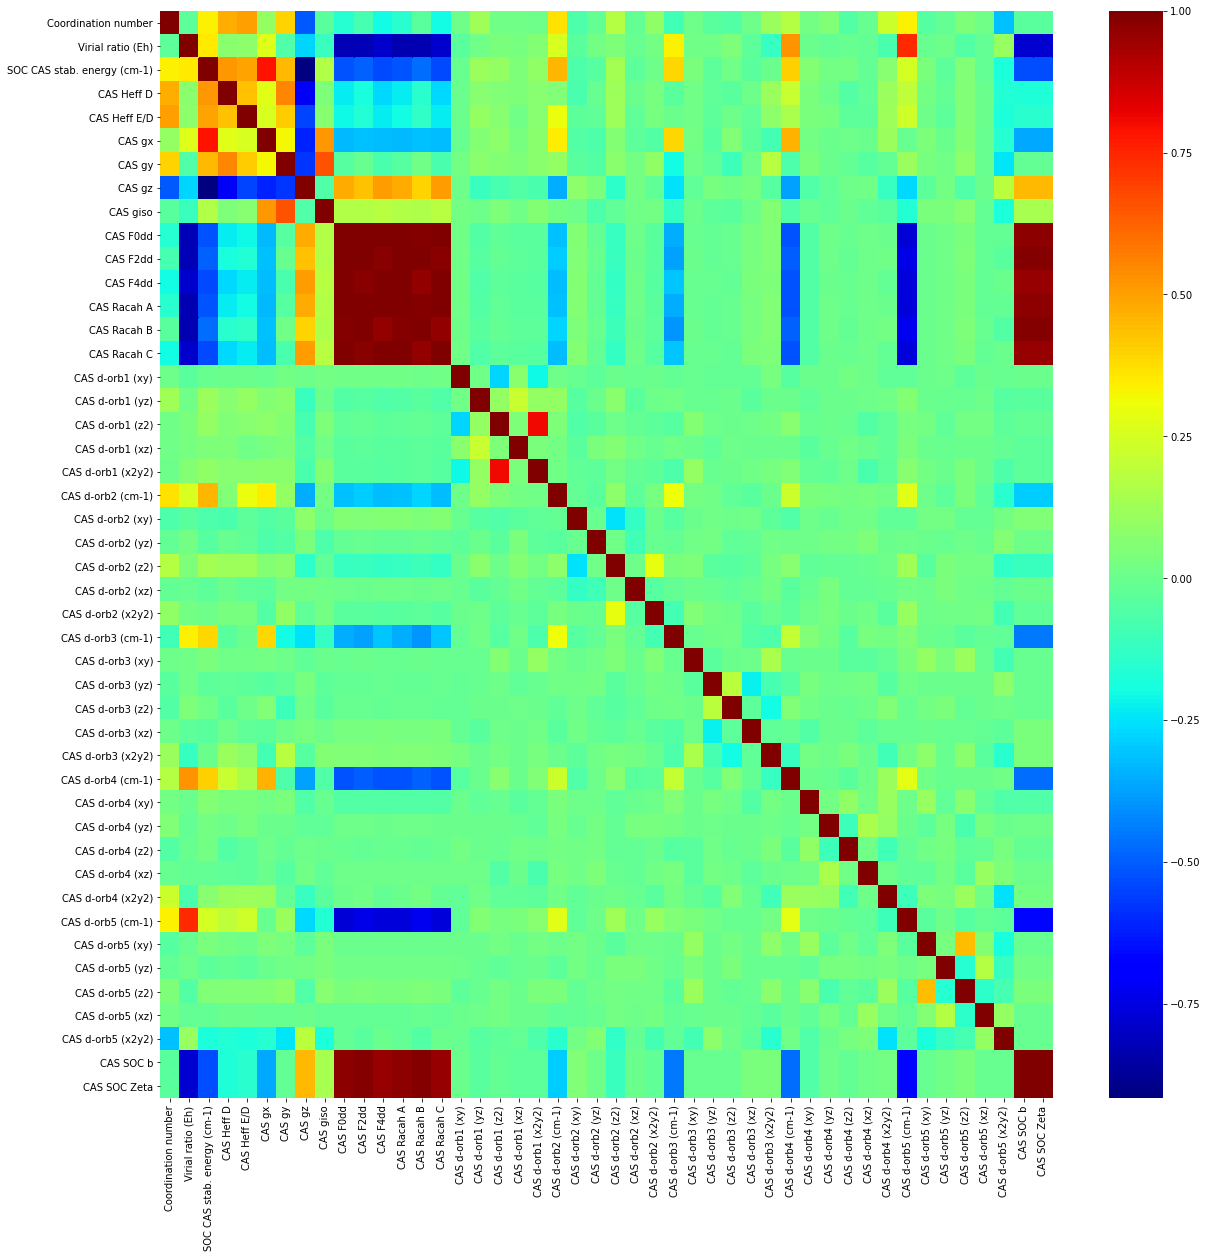

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="jet", annot=False)

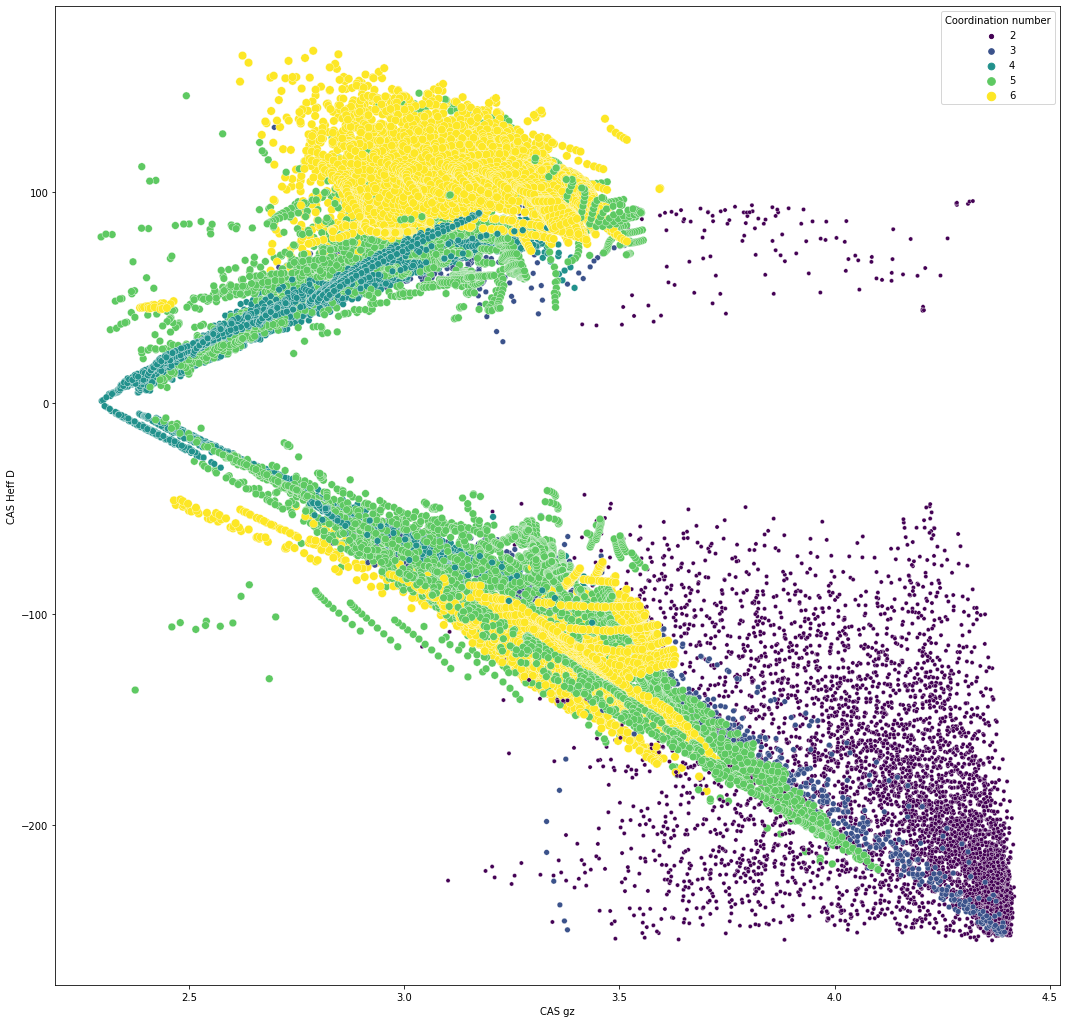

In [ ]:
plt.figure(figsize=(18,18))
sns.scatterplot(x="CAS gz",y="CAS Heff D", data=df, hue="Coordination number", size="Coordination number", palette="viridis")

<Figure size 1080x576 with 0 Axes>

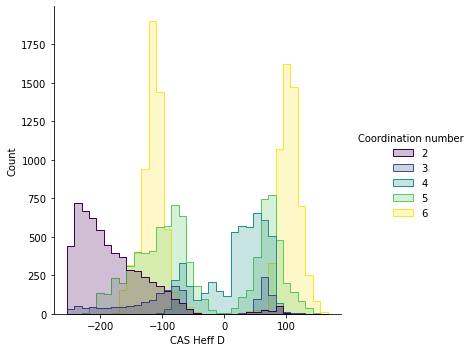

In [ ]:
plt.figure(figsize=(15,8))
sns.displot(df, x="CAS Heff D", hue="Coordination number", palette="viridis", element="step")

In [ ]:
df

,Coordination number,Virial ratio (Eh),SOC CAS stab. energy (cm-1),CAS Heff D,CAS Heff E/D,CAS gx,CAS gy,CAS gz,CAS giso,CAS F0dd,CAS F2dd,CAS F4dd,CAS Racah A,CAS Racah B,CAS Racah C,CAS d-orb1 (xy),CAS d-orb1 (yz),CAS d-orb1 (z2),CAS d-orb1 (xz),CAS d-orb1 (x2y2),CAS d-orb2 (cm-1),CAS d-orb2 (xy),CAS d-orb2 (yz),CAS d-orb2 (z2),CAS d-orb2 (xz),CAS d-orb2 (x2y2),CAS d-orb3 (cm-1),CAS d-orb3 (xy),CAS d-orb3 (yz),CAS d-orb3 (z2),CAS d-orb3 (xz),CAS d-orb3 (x2y2),CAS d-orb4 (cm-1),CAS d-orb4 (xy),CAS d-orb4 (yz),CAS d-orb4 (z2),CAS d-orb4 (xz),CAS d-orb4 (x2y2),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC b,CAS SOC Zeta
78,2,-2.000483,-826.53459,-250.4117,0.0001,1.327631,1.327698,4.407214,2.354181,201762.8,92668.7,57739.6,195347.3,1236.6,4582.5,-0.001033,-0.999999,0.000186,-0.000094,0.000117,3.9,0.000084,0.000220,0.866942,-0.001123,0.498407,2010.7,-0.983528,0.000999,0.000244,0.180752,0.000149,2010.8,-0.180752,0.000278,-0.000954,-0.983528,-0.000528,4557.0,0.000011,0.000009,-0.498407,0.000016,0.866943,7944.8,529.7
89,2,-2.000123,-809.02189,-252.1208,0.0001,1.294912,1.296576,4.391853,2.327780,198324.5,90292.2,56852.1,192007.6,1198.1,4512.1,0.042121,0.632828,-0.673972,0.045156,-0.376135,8.7,0.002262,0.772961,0.553700,0.008668,0.309624,2366.2,-0.173746,-0.029883,0.022530,0.984046,0.008034,2393.0,-0.983660,0.034150,-0.021076,-0.171867,-0.035567,7648.5,-0.021141,0.000178,-0.488085,0.000323,0.872540,7828.0,521.9
90,2,-1.999860,-790.88018,-251.8402,0.0001,1.322038,1.325258,4.378243,2.341846,195854.7,88589.4,56375.3,189590.8,1168.8,4474.2,-0.020506,0.435947,0.788691,-0.017491,0.432656,5.6,-0.054372,-0.897823,0.381150,-0.061133,0.204804,2639.2,0.024263,-0.048469,0.037312,0.997583,0.022298,2708.1,-0.994746,0.038918,0.002842,0.027999,-0.090408,8964.5,-0.080715,-0.000158,-0.480928,0.000429,0.873037,7733.1,515.5
91,2,-1.999977,-801.95271,-251.4733,0.0001,1.297383,1.300477,4.387623,2.328495,196832.8,89248.6,56542.4,190550.3,1180.3,4487.5,-0.040206,0.051572,0.873287,-0.030075,0.481859,2.8,-0.032699,-0.997157,0.043831,-0.047112,0.021616,2620.1,-0.008629,-0.045315,0.028531,0.998419,0.014739,2680.3,-0.995996,0.031051,-0.001762,-0.005914,-0.083606,8581.0,-0.072332,-0.000036,-0.484387,0.000344,0.871858,7769.1,517.9
92,2,-2.000062,-807.65838,-251.2326,0.0001,1.286634,1.289573,4.392279,2.322828,197551.4,89739.7,56678.4,191253.8,1188.8,4498.3,-0.047704,-0.410914,0.795387,-0.042100,0.440977,3.0,-0.005723,-0.910273,-0.360328,-0.029182,-0.201701,2597.2,-0.034815,-0.043079,0.022975,0.998151,0.009944,2649.7,-0.996177,0.026409,-0.005489,-0.032719,-0.076378,8241.6,-0.064119,0.000053,-0.486791,0.000292,0.871162,7796.0,519.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33726,6,-2.000379,-633.46118,83.4197,0.0914,1.164022,3.239810,3.351446,2.585093,199893.8,91650.4,57124.6,193546.6,1222.7,4533.7,-0.920265,-0.013446,0.004511,-0.378103,-0.099744,383.3,0.384989,0.109947,0.111957,-0.889147,-0.191255,467.7,0.007589,-0.037525,-0.494615,-0.242938,0.833590,2423.1,0.061501,-0.977512,-0.121653,-0.079469,-0.139907,8559.9,-0.032484,-0.175482,0.853230,-0.033492,0.488904,7902.7,526.8
33727,6,-2.000372,-624.24372,84.3268,0.0944,1.208929,3.227997,3.363317,2.600081,199889.1,91645.4,57124.1,193541.9,1222.6,4533.7,-0.889847,-0.004746,0.003552,-0.446006,-0.096004,398.4,0.447416,0.120778,0.144768,-0.842752,-0.232470,473.2,0.054438,-0.048212,-0.491312,-0.288237,0.818684,2473.3,0.063351,-0.973308,-0.122817,-0.081712,-0.164005,8496.9,-0.031862,-0.189044,0.850034,-0.033013,0.489489,7902.2,526.8
33728,6,-2.000363,-614.48968,85.2951,0.1066,1.255292,3.210749,3.376799,2.614280,199883.9,91639.8,57123.3,193536.9,1222.5,4533.6,0.857406,-0.003459,-0.003260,0.506243,0.092469,415.8,-0.494801,-0.133098,-0.193624,0.781139,0.299647,480.6,0.121779,-0.051704,-0.479890,-0.354294,0.791630,2530.3,-0.064

In [ ]:
df[df.duplicated("CAS Heff D")]

,Coordination number,Virial ratio (Eh),SOC CAS stab. energy (cm-1),CAS Heff D,CAS Heff E/D,CAS gx,CAS gy,CAS gz,CAS giso,CAS F0dd,CAS F2dd,CAS F4dd,CAS Racah A,CAS Racah B,CAS Racah C,CAS d-orb1 (xy),CAS d-orb1 (yz),CAS d-orb1 (z2),CAS d-orb1 (xz),CAS d-orb1 (x2y2),CAS d-orb2 (cm-1),CAS d-orb2 (xy),CAS d-orb2 (yz),CAS d-orb2 (z2),CAS d-orb2 (xz),CAS d-orb2 (x2y2),CAS d-orb3 (cm-1),CAS d-orb3 (xy),CAS d-orb3 (yz),CAS d-orb3 (z2),CAS d-orb3 (xz),CAS d-orb3 (x2y2),CAS d-orb4 (cm-1),CAS d-orb4 (xy),CAS d-orb4 (yz),CAS d-orb4 (z2),CAS d-orb4 (xz),CAS d-orb4 (x2y2),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC b,CAS SOC Zeta
158,2,-2.000461,-825.74731,-250.1390,0.0002,1.316369,1.318995,4.405726,2.347030,201498.6,92486.1,57659.3,195092.0,1233.7,4576.1,0.003708,-0.988859,-0.122210,-0.047673,-0.070264,3.0,-0.047933,-0.140659,0.858528,-0.010115,0.490658,2072.2,-0.001855,0.048629,-0.002845,-0.998809,-0.001853,2089.5,0.994138,-0.003009,-0.006651,-0.002174,0.107848,4882.1,-0.096822,-0.000059,-0.497938,-0.000003,0.861791,7936.0,529.1
4042,2,-2.000292,-804.01373,-236.8672,0.0006,1.244057,1.352776,4.337727,2.311520,201144.1,92272.9,57597.8,194744.4,1230.1,4571.3,-0.000021,0.468880,0.782531,0.000012,0.409630,7.9,-0.000011,-0.883188,0.409392,-0.000050,0.228859,1776.4,-0.168659,0.000049,-0.000037,-0.985674,0.000034,3139.0,0.985674,0.000012,-0.000105,-0.168659,0.000243,6267.6,-0.000252,0.011390,-0.469087,0.000092,0.883078,7934.2,528.9
4043,2,-2.000292,-805.05401,-239.7246,0.0008,1.246155,1.356353,4.339284,2.313930,201233.8,92335.4,57623.2,194831.3,1231.1,4573.3,-0.000026,0.423627,0.801928,-0.000003,0.421251,8.0,0.000004,0.905768,-0.369250,0.000055,-0.207941,1720.0,-0.168652,0.000047,-0.000053,-0.985676,0.000037,3039.7,-0.985676,-0.000019,0.000111,0.168652,-0.000252,6080.8,-0.000261,0.011206,-0.469644,0.000103,0.882785,7937.6,529.2
4050,2,-2.000346,-807.69272,-239.1427,0.0010,1.253872,1.357987,4.350127,2.320662,201438.5,92471.9,57686.5,195028.9,1233.1,4578.3,-0.000001,-0.773515,-0.563453,-0.000050,-0.290165,6.2,-0.000031,-0.633676,0.679367,-0.000010,0.370021,1847.9,-0.168725,0.000048,0.000015,-0.985663,0.000014,3038.0,0.985663,-0.000010,-0.000077,-0.168725,0.000204,6039.0,-0.000212,0.011361,-0.470087,0.000042,0.882547,7941.8,529.5
5018,2,-2.000399,-792.09750,-199.9881,0.0056,1.298994,1.557493,4.290018,2.382168,202319.7,93084.2,57951.7,195880.6,1242.6,4599.3,0.033447,0.863361,-0.046958,0.500658,-0.025017,47.0,-0.408007,0.046949,0.889075,0.039591,0.198252,1170.2,0.024551,-0.499474,-0.018834,0.861966,0.081138,2422.6,0.196727,0.053386,-0.125450,-0.068576,0.968508,3823.8,0.890566,-0.008939,0.437319,-0.009279,-0.124414,7971.9,531.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33500,6,-2.000344,-593.42880,88.8301,0.1485,1.354393,3.156369,3.394145,2.634969,199920.6,91661.8,57137.7,193572.0,1222.8,4534.7,0.787382,-0.018717,0.001268,0.611412,0.076509,466.6,-0.611517,-0.124670,-0.071267,0.774481,0.074860,593.8,0.020455,-0.127120,-0.526592,-0.132968,0.829724,2552.5,-0.068687,0.957838,0.117672,0.087852,0.237202,8142.5,0.030665,0.224711,-0.838912,0.030919,-0.493797,7902.6,526.8
33508,6,-2.000367,-615.44521,86.3973,0.1073,1.256676,3.204487,3.373186,2.611450,199916.6,91661.8,57133.8,193568.5,1222.9,4534.4,0.854721,-0.003543,0.003408,0.512365,0.083125,416.4,-0.513490,-0.121260,-0.081912,0.837787,0.114136,537.1,0.019174,-0.087186,-0.512428,-0.165129,0.837962,2466.9,-0.066175,0.967948,0.120117,0.085066,0.192442,8348.6,0.032139,0.201889,-0.846326,0.033032,-0.490763,7903.0,526.9
33605,6,-2.000388,-640.38804,84.1918,0.0982,1.127395,3.228029,3.342281,2.565902,199929.3,91676.8,57135.3,193580.9,1223.2,4534.6,0.946211,0.021585,-0.005894,0.306217,0.102058,371.9,-0.308416,-0.096404,-0.017398,0.945229,0.042716,537.4,-0.070374,-0.040555,-0.502759,-0.075096,0.857319,2303.6,-0.

In [ ]:
df[df["CAS Heff D"] == -102.0632]

,Coordination number,Virial ratio (Eh),SOC CAS stab. energy (cm-1),CAS Heff D,CAS Heff E/D,CAS gx,CAS gy,CAS gz,CAS giso,CAS F0dd,CAS F2dd,CAS F4dd,CAS Racah A,CAS Racah B,CAS Racah C,CAS d-orb1 (xy),CAS d-orb1 (yz),CAS d-orb1 (z2),CAS d-orb1 (xz),CAS d-orb1 (x2y2),CAS d-orb2 (cm-1),CAS d-orb2 (xy),CAS d-orb2 (yz),CAS d-orb2 (z2),CAS d-orb2 (xz),CAS d-orb2 (x2y2),CAS d-orb3 (cm-1),CAS d-orb3 (xy),CAS d-orb3 (yz),CAS d-orb3 (z2),CAS d-orb3 (xz),CAS d-orb3 (x2y2),CAS d-orb4 (cm-1),CAS d-orb4 (xy),CAS d-orb4 (yz),CAS d-orb4 (z2),CAS d-orb4 (xz),CAS d-orb4 (x2y2),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC b,CAS SOC Zeta
24695,6,-2.000410,-573.41273,-102.0632,0.2925,1.350424,2.750956,3.456619,2.519333,200843.9,92301.8,57471.6,194458.2,1232.1,4561.2,-0.981650,0.040445,0.006098,-0.179703,-0.048956,840.3,-0.166326,0.136995,0.079312,0.968460,-0.096764,1252.5,-0.081277,-0.265921,-0.481843,0.144873,0.818242,2232.7,-0.041052,-0.948509,0.058693,0.092918,-0.294223,7599.8,-0.020186,-0.095988,0.870664,-0.013050,0.481823,7936.6,529.1
27019,5,-2.000192,-407.46265,-102.0632,0.1826,1.977485,2.334582,3.238930,2.516999,198035.8,90460.6,56515.1,191756.3,1205.4,4485.3,-0.029977,-0.063451,0.159168,-0.984718,0.008472,741.9,-0.235710,-0.648760,-0.720112,-0.067595,-0.020526,1515.6,0.967849,-0.213130,-0.120131,-0.035547,-0.046351,4302.2,0.081372,0.677284,-0.632740,-0.145500,0.336355,7364.3,0.013725,-0.266359,0.203255,0.057689,0.940332,7843.9,522.9


In [ ]:
df["CAS Heff E/D"].max()

0.3333

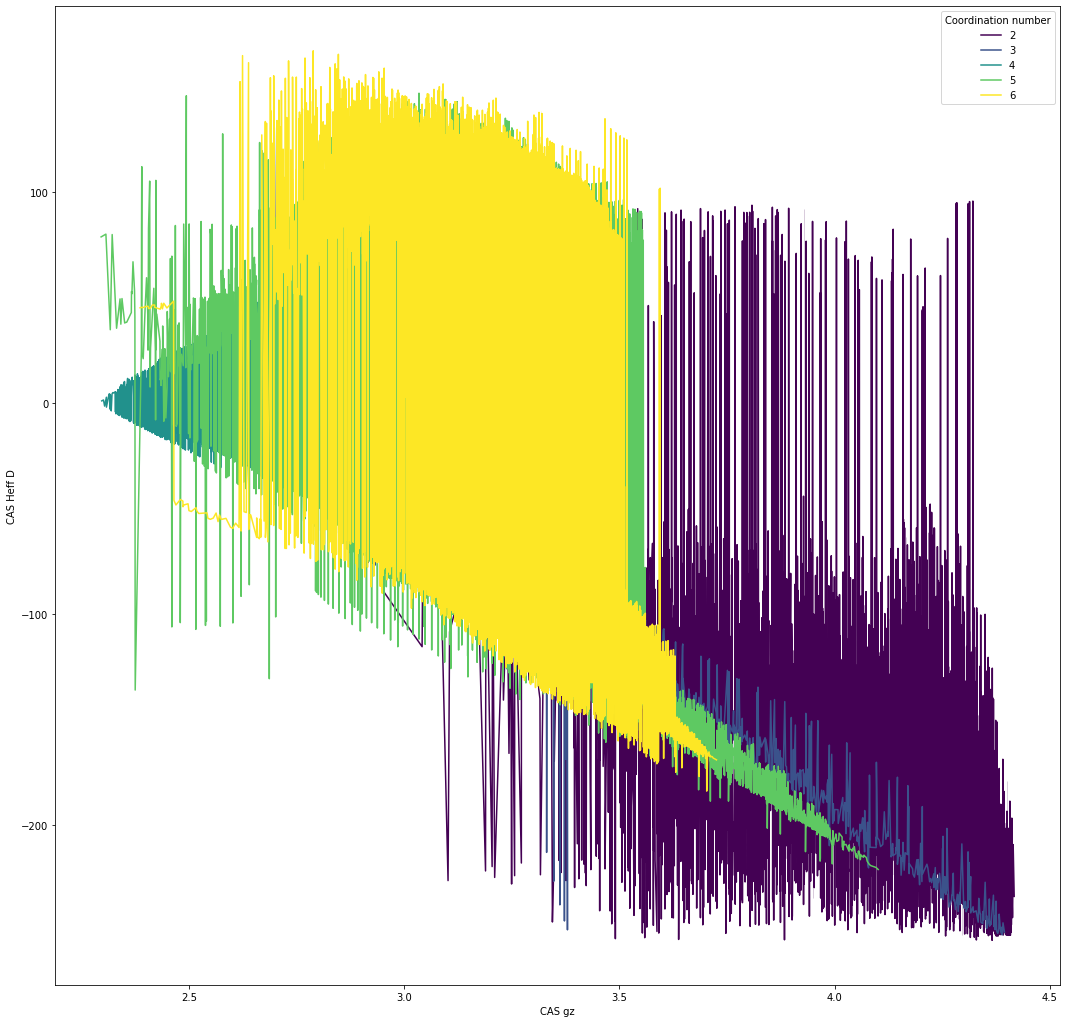

In [ ]:
plt.figure(figsize=(18,18))
sns.lineplot(x="CAS gz",y="CAS Heff D", data=df, hue="Coordination number", palette="viridis")

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Coordination number,32724.0,4.553600,1.463414,2.000000,4.000000,5.000000,6.000000,6.000000
Virial ratio (Eh),32724.0,-2.000201,0.000248,-2.000507,-2.000342,-2.000260,-2.000124,-1.997259
SOC CAS stab. energy (cm-1),32724.0,-496.263378,171.437720,-831.526510,-608.288338,-497.172535,-370.591592,-128.416270
CAS Heff D,32724.0,-46.960058,112.853022,-254.647000,-128.433225,-79.738950,69.806500,166.857200
CAS Heff E/D,32724.0,0.165677,0.104292,0.000100,0.072800,0.175200,0.257400,0.333300
CAS gx,32724.0,1.634848,0.397102,0.000345,1.326178,1.700242,1.948197,2.325489
CAS gy,32724.0,2.342503,0.472008,0.457344,2.107993,2.436568,2.652407,3.426256
CAS gz,32724.0,3.341011,0.485585,2.295700,3.014777,3.292762,3.553364,4.417111
CAS giso,32724.0,2.439454,0.162255,1.093880,2.372664,2.470613,2.537067,2.740461
CAS F0dd,32724.0,199108.806170,1811.554855,188852.200000,198352.550000,199146.450000,200085.125000,203399.900000


In [ ]:
df_bkp

,Structure name,Cartesian coordinates,Internal coordinates,Coordination number,Bond lengths 1,Bond lengths 2,Bond angles,CAS root Mult,CAS GS energy (Eh),CAS transition energies,CAS 1 el energy (Eh),CAS 2 el energy (Eh),CAS nucl. repulsion (Eh),Kinetic energy (Eh),Potential energy (Eh),Virial ratio (Eh),Core energy (Eh),SOC CAS lowest eigenv. (Eh),SOC CAS stab. energy (cm-1),CAS Kramers,CAS Ms states,CAS 2PT D,CAS 2PT E/D,CAS Heff D,CAS Heff E/D,CAS gx,CAS gy,CAS gz,CAS giso,CAS F0dd,CAS F2dd,CAS F4dd,CAS Racah A,CAS Racah B,CAS Racah C,CAS d-orb1 (eV),CAS d-orb1 (cm-1),CAS d-orb1 (xy),CAS d-orb1 (yz),CAS d-orb1 (z2),CAS d-orb1 (xz),CAS d-orb1 (x2y2),CAS d-orb2 (eV),CAS d-orb2 (cm-1),CAS d-orb2 (xy),CAS d-orb2 (yz),CAS d-orb2 (z2),CAS d-orb2 (xz),CAS d-orb2 (x2y2),CAS d-orb3 (eV),CAS d-orb3 (cm-1),CAS d-orb3 (xy),CAS d-orb3 (yz),CAS d-orb3 (z2),CAS d-orb3 (xz),CAS d-orb3 (x2y2),CAS d-orb4 (eV),CAS d-orb4 (cm-1),CAS d-orb4 (xy),CAS d-orb4 (yz),CAS d-orb4 (z2),CAS d-orb4 (xz),CAS d-orb4 (x2y2),CAS d-orb5 (eV),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC a,CAS SOC b,CAS SOC Zeta
78,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2.0,2.6,2.400000,180.000000,4.0,-1493.261544,1: 1 4 0.000000 0.000 0.0\...,-2327.418524,692.611924,141.637901,1492.447193,-2985.615892,-2.000483,-1466.315463,NaN,-826.53459,0: 0.00 0.0000 4.48...,NaN,-250.411689,0.000221,-250.4117,0.0001,1.327631,1.327698,4.407214,2.354181,201762.8,92668.7,57739.6,195347.3,1236.6,4582.5,0.0,0.0,-0.001033,-0.999999,0.000186,-0.000094,0.000117,0.000,3.9,0.000084,0.000220,0.866942,-0.001123,0.498407,0.249,2010.7,-0.983528,0.000999,0.000244,0.180752,0.000149,0.249,2010.8,-0.180752,0.000278,-0.000954,-0.983528,-0.000528,0.565,4557.0,0.000011,0.000009,-0.498407,0.000016,0.866943,15.0,7944.8,529.7
89,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2.0,1.8,2.600000,175.000000,4.0,-1493.258181,1: 1 4 0.000073 0.002 16.1\...,-2364.311959,710.950496,160.198938,1492.978235,-2986.140760,-2.000123,-1466.832297,NaN,-809.02189,0: 0.00 0.0000 4.55...,NaN,-252.120767,0.000053,-252.1208,0.0001,1.294912,1.296576,4.391853,2.327780,198324.5,90292.2,56852.1,192007.6,1198.1,4512.1,0.0,0.0,0.042121,0.632828,-0.673972,0.045156,-0.376135,0.001,8.7,0.002262,0.772961,0.553700,0.008668,0.309624,0.293,2366.2,-0.173746,-0.029883,0.022530,0.984046,0.008034,0.297,2393.0,-0.983660,0.034150,-0.021076,-0.171867,-0.035567,0.948,7648.5,-0.021141,0.000178,-0.488085,0.000323,0.872540,15.0,7828.0,521.9
90,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2.0,1.9,1.800000,175.000000,4.0,-1493.280136,1: 1 4 0.000173 0.005 38.0\...,-2403.677133,730.549007,179.944189,1493.392966,-2986.576903,-1.999860,-1467.285834,NaN,-790.88018,0: 0.00 0.0000 4.55...,NaN,-251.840222,0.000037,-251.8402,0.0001,1.322038,1.325258,4.378243,2.341846,195854.7,88589.4,56375.3,189590.8,1168.8,4474.2,0.0,0.0,-0.020506,0.435947,0.788691,-0.017491,0.432656,0.001,5.6,-0.054372,-0.897823,0.381150,-0.061133,0.204804,0.327,2639.2,0.024263,-0.048469,0.037312,0.997583,0.022298,0.336,2708.1,-0.994746,0.038918,0.002842,0.027999,-0.090408,1.111,8964.5,-0.080715,-0.000158,-0.480928,0.000429,0.873037,15.0,7733.1,515.5
91,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2.0,1.9,1.900000,175.000000,4.0,-1493.293918,1: 1 4 0.000103 0.003 22.6\...,-2395.997525,726.763765,176.035937,1493.231913,-2986.429737,-1.999977,-1467.185276,NaN,-801.95271,0: 0.00 0.0000 4.56...,NaN,-251.473341,0.000027,-251.4733,0.0001,1.297383,1.300477,4.387623,2.328495,196832.8,89248.6,56542.4,190550.3,1180.3,4487.5,0.0,0.0,-0.040206,0.051572,0.873287,-0.030075,0.481859,0.000,2.8,-0.032699,-0.997157,0.043831,-0.047112,0.021616,0.325,2620.1,-0.008629,-0.045315,0.028531,0.998419,0.014739,0.332,2680.3,-0.995996,0.031051,-0.001762,-0.005914,-0.083606,1.064,8581.0,-0.072332,-0.000036,-0.484387,0.000344,0.871858,15.0,7769.1,51